# Отбор коров для молочного хозяйства «Вольный луг». 

# Цель проекта:
Отбор коров для покупки по двум критериям:
•	средний удой за год — не менее 6000 килограммов;
•	молоко должно быть вкусным.


<b>Этапы выполнения:</b> 
1. Загрузка данных, анализ общей информации;
2. Предобработка данных: 
* замена названий столбцов;
* преобразование типов данных;
* удаление и замена пропусков и дубликатов;
* подсчет суммарных продаж во всех регионах.
3. Исследовательский анализ данных - описание и визуализация общей информации:
* статистический анализ всех признаков;
* построение графиков для каждого признака. 
4. Корреляционный анализ признаков:
* расчет коэффициентов корреляции между всеми признаками;
* построение диаграмм рассеяния для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков.
5. Прогноз удоя коров:
* обучение трех моделей линейной регрессии;
* оценка качества моделей и выбор лучшей;
* прогноз удоя коров.
6. Прогноз вкуса молока:
* обученеи модели логистической регрессии;
* прогноз вкуса молока.
4. Формирование  списка коров для покупки и итогового вывода. 

<b>Описание данных:</b> 
1.	Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных: 
* id — уникальный идентификатор коровы.
* Удой, кг — масса молока, которую корова даёт в год (в килограммах).
* ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
* Сырой протеин, г — содержание сырого протеина в корме (в граммах).
* СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
* Порода — порода коровы.
* Тип пастбища — ландшафт лугов, на которых паслась корова.
* порода папы_быка — порода папы коровы.
* Жирность,% — содержание жиров в молоке (в процентах).
* Белок,% — содержание белков в молоке (в процентах).
* Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
* Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

2.	Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных: 
* id — уникальный идентификатор коровы.
* Имя Папы — имя папы коровы.

3.	Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных: 
* Порода — порода коровы.
* Тип пастбища — ландшафт лугов, на которых паслась корова.
* порода папы_быка — порода папы коровы.
* Имя_папы — имя папы коровы.
* Текущая_жирность,% — содержание жиров в молоке (в процентах).
* Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
* Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).


## Загрузка данных

In [1]:
#импорт библиотек и настройка отображения 
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

!pip install phik==0.10.0 -q
import phik


pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

# создание константы RANDOM_STATE
RANDOM_STATE = 42

In [2]:
#загружаем датасеты, явно укажем разделитель ";"
ferma_main = pd.read_csv(, sep=';')
ferma_dad = pd.read_csv(, sep=';')
cow_buy = pd.read_csv(, sep=';')

In [3]:
#функция для расчета количесства строк в столбце, количество заполненных и доли пропусков
def df_info(df, str1 = "-------\n", str2 = "\n\n") :
    print(str1)
    df_size = df.size
    not_na_count = df.notna().sum()
    na_count = df.isna().sum()
    dublicated = df.duplicated().sum()
    
    if df_size == na_count:
        print('Данные отсутствуют')
    elif df_size == 0 :
        print('Данные отсутствуют')
    else:
        print(f"size: {df_size}")
        print(f"na_count: {na_count}")
        print(f"not_na_count: {not_na_count}")
        print(f"na_ratio: {(na_count / df_size):.2f}") 
        print(f"duplicated: {dublicated}") 
        print(f"duplicated_ratio: {(dublicated / df_size):.2f}") 
    print(str2)

In [4]:
#создаем функцию для применения предыдущей функции к каждому столбцу 
def data_info (data, col_name):
    print(col_name)
    df_info(data[col_name])

In [5]:
#смотрим результат для ferma_main
for el in ferma_main.columns:
    data_info(ferma_main, el)
print(ferma_main.info())
print('Дублей: ', ferma_main.duplicated().sum())
print(ferma_main.isna().sum())

id
-------

size: 634
na_count: 0
not_na_count: 634
na_ratio: 0.00
duplicated: 5
duplicated_ratio: 0.01



Удой, кг
-------

size: 634
na_count: 0
not_na_count: 634
na_ratio: 0.00
duplicated: 106
duplicated_ratio: 0.17



ЭКЕ (Энергетическая кормовая единица)
-------

size: 634
na_count: 0
not_na_count: 634
na_ratio: 0.00
duplicated: 579
duplicated_ratio: 0.91



Сырой протеин, г
-------

size: 634
na_count: 0
not_na_count: 634
na_ratio: 0.00
duplicated: 233
duplicated_ratio: 0.37



СПО (Сахаро-протеиновое соотношение)
-------

size: 634
na_count: 0
not_na_count: 634
na_ratio: 0.00
duplicated: 622
duplicated_ratio: 0.98



Порода
-------

size: 634
na_count: 0
not_na_count: 634
na_ratio: 0.00
duplicated: 632
duplicated_ratio: 1.00



Тип пастбища
-------

size: 634
na_count: 0
not_na_count: 634
na_ratio: 0.00
duplicated: 631
duplicated_ratio: 1.00



порода папы_быка
-------

size: 634
na_count: 0
not_na_count: 634
na_ratio: 0.00
duplicated: 631
duplicated_ratio: 1.00



Жирность,%
--

In [6]:
#смотрим результат для ferma_dad
for el in ferma_dad.columns:
    data_info(ferma_dad, el)
print(ferma_dad.info())
print('Дублей: ', ferma_dad.duplicated().sum())
print(ferma_dad.isna().sum())

id
-------

size: 629
na_count: 0
not_na_count: 629
na_ratio: 0.00
duplicated: 0
duplicated_ratio: 0.00



Имя Папы
-------

size: 629
na_count: 0
not_na_count: 629
na_ratio: 0.00
duplicated: 625
duplicated_ratio: 0.99



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
None
Дублей:  0
id          0
Имя Папы    0
dtype: int64


In [7]:
#смотрим результат для cow_buy
for el in cow_buy.columns:
    data_info(cow_buy, el)
print(cow_buy.info())
print('Дублей: ', cow_buy.duplicated().sum())
print(cow_buy.isna().sum())

Порода
-------

size: 20
na_count: 0
not_na_count: 20
na_ratio: 0.00
duplicated: 18
duplicated_ratio: 0.90



Тип пастбища
-------

size: 20
na_count: 0
not_na_count: 20
na_ratio: 0.00
duplicated: 18
duplicated_ratio: 0.90



порода папы_быка
-------

size: 20
na_count: 0
not_na_count: 20
na_ratio: 0.00
duplicated: 18
duplicated_ratio: 0.90



Имя_папы
-------

size: 20
na_count: 0
not_na_count: 20
na_ratio: 0.00
duplicated: 16
duplicated_ratio: 0.80



Текущая_жирность,%
-------

size: 20
na_count: 0
not_na_count: 20
na_ratio: 0.00
duplicated: 8
duplicated_ratio: 0.40



Текущий_уровень_белок,%
-------

size: 20
na_count: 0
not_na_count: 20
na_ratio: 0.00
duplicated: 8
duplicated_ratio: 0.40



Возраст
-------

size: 20
na_count: 0
not_na_count: 20
na_ratio: 0.00
duplicated: 18
duplicated_ratio: 0.90



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                  

In [8]:
# поправим названия столбцов в каждой таблице
ferma_main = ferma_main.rename(columns={"Удой, кг": "milk_yield", 
                           "ЭКЕ (Энергетическая кормовая единица)": "efu", 
                           "Сырой протеин, г": "crude_protein", 
                           "СПО (Сахаро-протеиновое соотношение)": "spo", 
                           "Порода": "breed", 
                           "Тип пастбища": "pasture_type", 
                           "порода папы_быка": "daddy_breed",
                           "Жирность,%": "fat_content",
                           "Белок,%": "protein",
                           "Вкус молока": "taste",
                           "Возраст": "age"})

ferma_dad = ferma_dad.rename(columns={"Имя Папы": "daddy_name"})

cow_buy = cow_buy.rename(columns={"Порода": "breed_ecofarms", 
                           "Тип пастбища": "pasture_type_ecofarms", 
                           "порода папы_быка": "daddy_breed_ecofarms", 
                           "Имя_папы": "daddy_name_ecofarms",        
                           "Текущая_жирность,%": "fat_content_ecofarms", 
                           "Текущий_уровень_белок,%": "protein_ecofarms", 
                           "Возраст": "age_ecofarms"})

print(ferma_main.columns)
print(ferma_dad.columns)
print(cow_buy.columns)

Index(['id', 'milk_yield', 'efu', 'crude_protein', 'spo', 'breed',
       'pasture_type', 'daddy_breed', 'fat_content', 'protein', 'taste',
       'age'],
      dtype='object')
Index(['id', 'daddy_name'], dtype='object')
Index(['breed_ecofarms', 'pasture_type_ecofarms', 'daddy_breed_ecofarms',
       'daddy_name_ecofarms', 'fat_content_ecofarms', 'protein_ecofarms',
       'age_ecofarms'],
      dtype='object')


Выводы: на первый взгляд, в данных нет пропусков. Подробнее проверим на следующем шаге. 

Не для всех коров из списка ferma_main есть информация об имени папы коровы (данных в ferma_dad меньше). 

Названия столбцов были приведены к привычному виду - исключены названия на кириллице и повторы. 

##  Предобработка данных

In [9]:
ferma_main

,id,milk_yield,efu,crude_protein,spo,breed,pasture_type,daddy_breed,fat_content,protein,taste,age
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
629,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
630,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
631,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
632,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


In [10]:
# поправим типы данных в ferma_main на корректные
ferma_main['milk_yield'] = ferma_main['milk_yield'].astype(int)
ferma_main['efu'] = ferma_main['efu'].str.replace(',', '.').astype(float)
ferma_main['crude_protein'] = ferma_main['crude_protein'].astype(int)
ferma_main['spo'] = ferma_main['spo'].str.replace(',', '.').astype(float)
ferma_main['fat_content'] = ferma_main['fat_content'].str.replace(',', '.').astype(float)
ferma_main['protein'] = ferma_main['protein'].str.replace(',', '.').astype(float)

In [11]:
# поправим типы данных в cow_buy на корректные
cow_buy['fat_content_ecofarms'] = cow_buy['fat_content_ecofarms'].str.replace(',', '.').astype(float)
cow_buy['protein_ecofarms'] = cow_buy['protein_ecofarms'].str.replace(',', '.').astype(float)

In [12]:
#удалим дубликаты в ferma_main
ferma_main = ferma_main.drop_duplicates()
ferma_main.shape

(629, 12)

In [13]:
#дубли в таблице cow_buy почмотрим вручную: там нет ID коровы, возможно, данные по ним просто совпадают
cow_buy[cow_buy.duplicated() == True]

,breed_ecofarms,pasture_type_ecofarms,daddy_breed_ecofarms,daddy_name_ecofarms,fat_content_ecofarms,protein_ecofarms,age_ecofarms
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.08,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.07,более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.07,более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.07,более_2_лет


Полными дублями являются строки 8, 14. поскольку ID коровы отсутствует, полностью исключать наличие двух коров от одного папы с одинаковыми показателями нельзя. Дубли в этой таблице оставляем 

In [14]:
#посмотрим на уникальные значения в каждом столбце с категориальными данными
print(ferma_main['breed'].unique())
print(ferma_main['pasture_type'].unique())
print(ferma_main['daddy_breed'].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг']
['Равнинное' 'Равнинные' 'Холмистое']
['Айдиал' 'Соверин' 'Айдиалл']


Заменим "Айдиалл" на "Айдиал", чтобы названия пород соответствовали 

In [15]:
ferma_main['daddy_breed'] = ferma_main['daddy_breed'].replace('Айдиалл', 'Айдиал')
ferma_main['pasture_type'] = ferma_main['pasture_type'].replace('Равнинные', 'Равнинное')

Выводы: мы привели в порядок типы данных в таблицах, в данных о коровах "Вольного луга" удалили дубли и неявные дубли.

## Исследовательский анализ данных

In [16]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             629 non-null    int64  
 1   milk_yield     629 non-null    int64  
 2   efu            629 non-null    float64
 3   crude_protein  629 non-null    int64  
 4   spo            629 non-null    float64
 5   breed          629 non-null    object 
 6   pasture_type   629 non-null    object 
 7   daddy_breed    629 non-null    object 
 8   fat_content    629 non-null    float64
 9   protein        629 non-null    float64
 10  taste          629 non-null    object 
 11  age            629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB


Начнем с Вольного луга. Посмотрим на графики распределения признаков 

In [17]:
ferma_main.describe()

,id,milk_yield,efu,crude_protein,spo,fat_content,protein
count,629.00,629.00,629.00,629.00,629.00,629.00,629.00
mean,315.00,6188.75,14.54,1923.36,0.91,3.60,3.08
std,181.72,1644.80,1.31,182.96,0.03,0.17,0.00
min,1.00,5204.00,10.90,1660.00,0.84,2.99,3.07
25%,158.00,5751.00,13.50,1771.00,0.89,3.59,3.07
50%,315.00,6133.00,14.70,1888.00,0.93,3.65,3.08
75%,472.00,6501.00,15.60,2062.00,0.94,3.72,3.08
max,629.00,45616.00,16.80,2349.00,0.96,3.75,3.08


Выглядит неплохо, за исключением удоя молока - тут точно есть выброс в 45 тонн. посмотрим, сколько значений содержит таблица больше 8 тонн

In [18]:
ferma_main[ferma_main['milk_yield'] > 8000]

,id,milk_yield,efu,crude_protein,spo,breed,pasture_type,daddy_breed,fat_content,protein,taste,age
16,17,45616,11.50,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.22,3.08,вкусно,более_2_лет


Хоть у этой коровы и вкусное молоко, придется убрать ее из данных - значения не выглядят правдоподобными. 

In [19]:
#Уберем выброс и проверим размерность 
ferma_main = ferma_main[ferma_main['milk_yield'] < 8000]
ferma_main.shape

(628, 12)

In [20]:
#определим столбцы
col=['milk_yield', 'efu', 'crude_protein', 'spo', 'fat_content', 'protein']
cat_col=['breed','pasture_type', 'daddy_breed','taste','age']

In [21]:
#сделаем графики зелененькими, как луг 
colors=['palegreen', 'lightgreen', 'forestgreen', 
        'limegreen', 'darkgreen', 'seagreen', 'mediumseagreen', 'springgreen', 'mediumaquamarine']

In [22]:
#сооздадим функцию, которая поможет нам с графиками
def visual (df, col):
    df[col].plot(
        kind='hist',
        title=col,
        alpha=0.5,
        color=np.random.choice(colors)
    )
    plt.xlabel(col)
    plt.ylabel('Количество коров');
    plt.show()
    
    df[col].plot(
    kind='box',
    title=col,
    color=np.random.choice(colors)
    );
    plt.show()

In [23]:
#сооздадим функцию, которая поможет нам с графиками по категориальным данным 
def visual_cat (df, col):
    ax = sns.countplot(x=col, data=df, color=np.random.choice(colors))
    plt.xlabel(col)
    plt.ylabel('Количество коров')
    plt.title(col)
    plt.show()

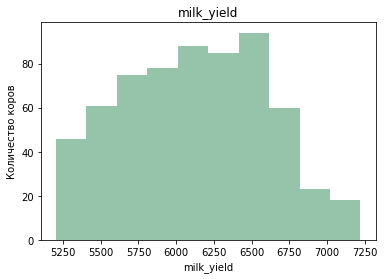

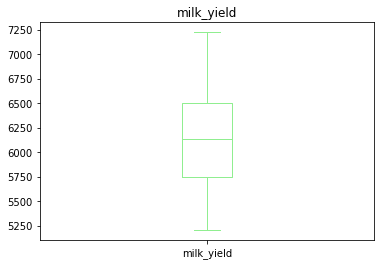

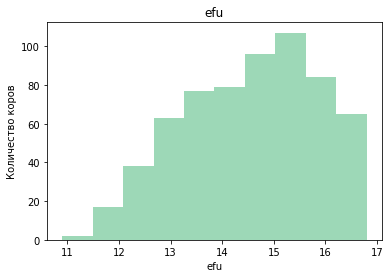

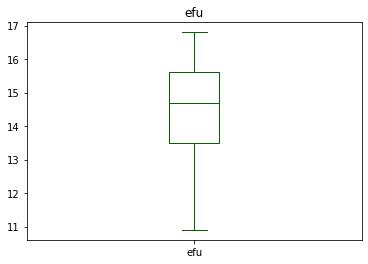

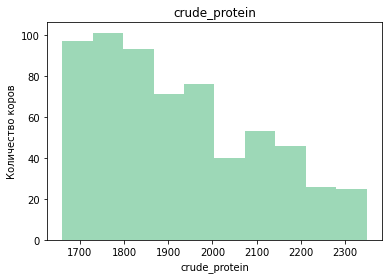

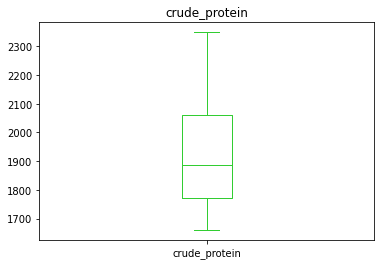

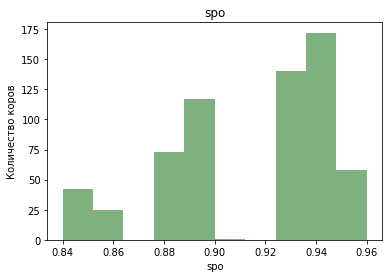

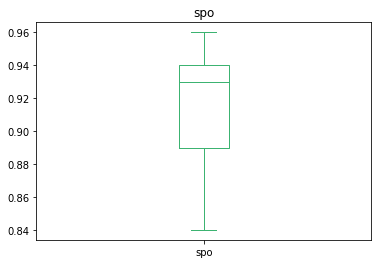

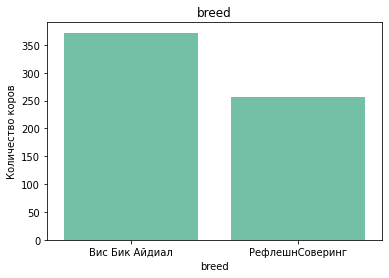

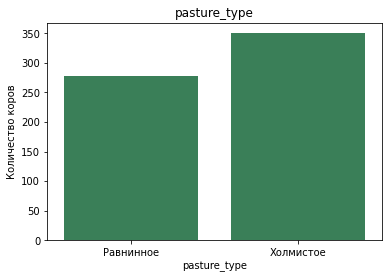

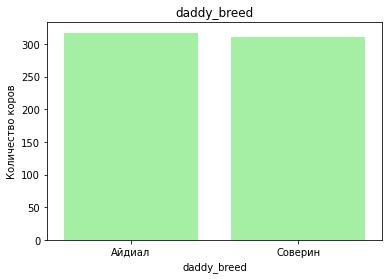

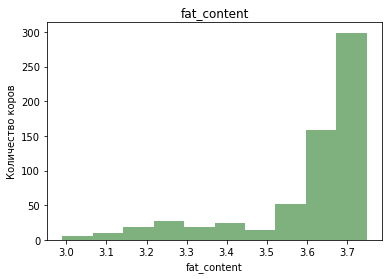

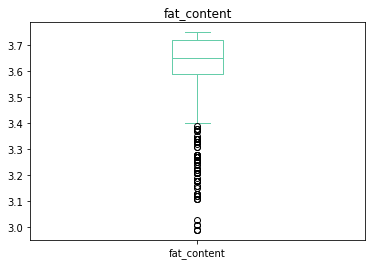

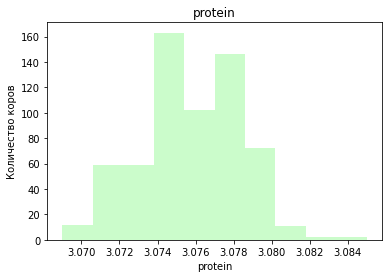

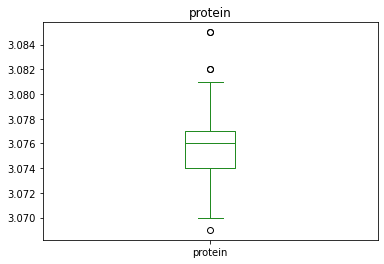

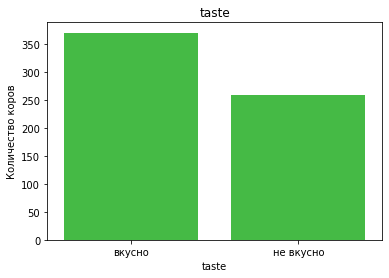

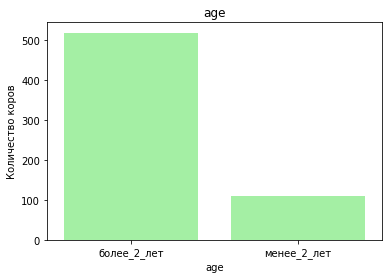

In [24]:
#применим их к каждому столбцу ferma_main
for el in ferma_main.columns:
    if el in col:
        visual(ferma_main, el)
    elif el in cat_col:
        visual_cat(ferma_main, el)

В столбцах с содержанием белков и протеина есть некоторые выбросы, посмотрим на эти данные подробнее

In [25]:
#посчитаем, сколько коров дают молоко с жирностью менее 3,4 %
ferma_main[ferma_main['fat_content'] < 3.4]['fat_content'].count()

86

Многовато для выбросов. Может ли быть такое, что коровы дают менее жирное молоко? В целом, да.

Посмотрим, сколько коров дают молоко с выбросным содержанием белка


In [26]:
ferma_main[(ferma_main['protein'] < 3.07) | (ferma_main['protein'] > 3.08) ]['protein'].count()

16

Уберем эти выбросы, их мало, но они могут повлиять в дальнейшем на качество модели.


In [27]:
ferma_main = ferma_main[(ferma_main['protein'] > 3.07) & (ferma_main['protein'] < 3.081) ]
ferma_main.shape

(601, 12)

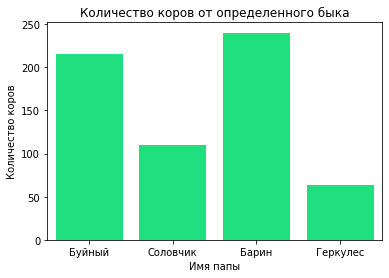

In [28]:
#посмотрим, как обстоят дела с именами быков, от которых у фермера коровы 
ax = sns.countplot(x='daddy_name', data=ferma_dad, color=np.random.choice(colors))
plt.xlabel('Имя папы')
plt.ylabel('Количество коров')
plt.title("Количество коров от определенного быка")
plt.show()

In [29]:
#проведем аналогичные манипуляции для ЭкоФермы
cat_col_ecofarm = ['breed_ecofarms', 'pasture_type_ecofarms', 'daddy_breed_ecofarms', 'daddy_name_ecofarms', 'age_ecofarms']
col_ecofarm = ['fat_content_ecofarms', 'protein_ecofarms']

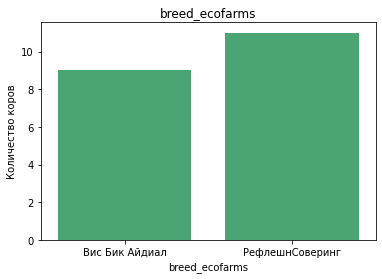

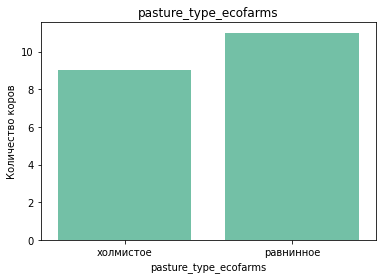

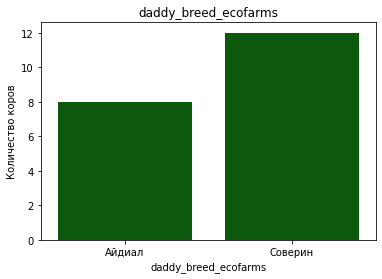

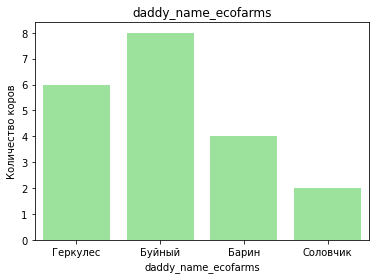

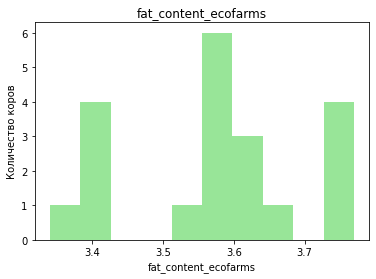

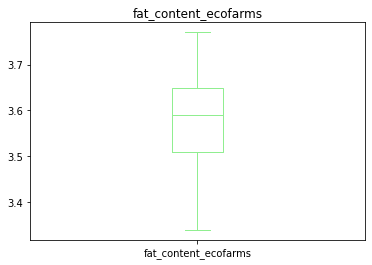

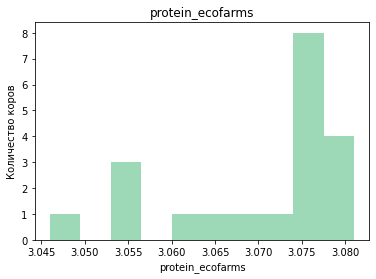

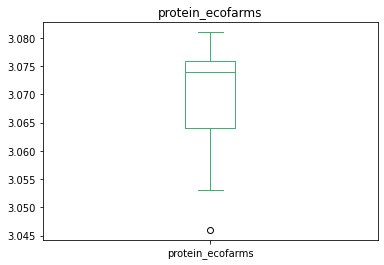

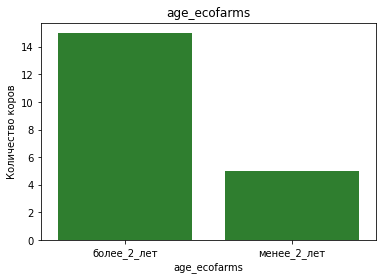

In [30]:
#применим их к каждому столбцу cow_buy
for el in cow_buy.columns:
    if el in col_ecofarm:
        visual(cow_buy, el)
    elif el in cat_col_ecofarm:
        visual_cat(cow_buy, el)

Выводы:
По Веселому лугу:
1. Удой молока распределен нормально, исключен 1 выброс, средний удой около 6100 кг;
2. Питательность корма тоже распределена нормально, выбросов нет;
3. Сырой протеин не распределен нормально, выбросов нет. Медиана немного не доходит до отметки в 1900;
4. Отношение сахара к протеину тоже не имеет нормального распределения, значений 0,87, 0,91 вообще не бывает в тих данных;
5. Больше коров породы Вис Бик Айдиал;
6. Чаще всего коровы пасутся на холмах;
7. Все коровы почтив  пропорции 50/550 рождены от пород папы Айдиал и Северин;
8. С жирностью есть проблемы - 13.7% данных - выбросы. Пока оставим, они похожи на правдоподобные
9. С протеином аналогично, но тут данных сильно меньше - 2,5% данных выбиваются из распределения. 
10. Вкусного молока больше)
11. Коровы в основном старше 2 лет
12. Больше всего коров от Барина.

По Экоферме:
1. Больше коров породы РефлешнСеверинг;
2. Коровы чаще пасутся на равнинной местности;
3. Порода папы чаще Северин;
4. Больше всего коров от Буйного;
5. Жирность аналогичнл Веселому лугу не имеет нормального распределения, однако выбросы отсутствуют;
6. Содержание белка аналогично распределено не нормально, с одним выбросом в 3,045. Остаивм его, его исключение - сокращение выборки на 5%, да еще и значение в 3,055 окажется "за бортом". 

## Корреляционный анализ

interval columns not set, guessing: ['milk_yield', 'efu', 'crude_protein', 'spo', 'fat_content', 'protein']


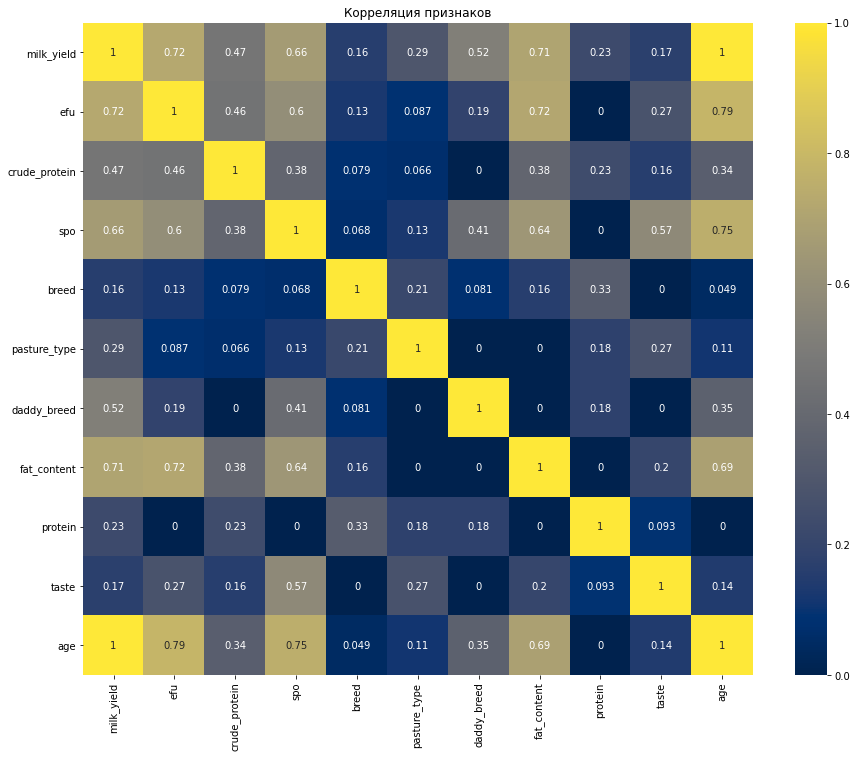

In [31]:
#посмотрим на коэффициенты корреляции между признаками
plt.figure(figsize=(15, 12))
ferma_main_corr = ferma_main.drop('id', axis=1)
sns.heatmap(ferma_main_corr.phik_matrix(), annot=True, cmap='cividis')
plt.title('Корреляция признаков');

interval columns not set, guessing: ['milk_yield', 'efu', 'crude_protein', 'spo', 'fat_content', 'protein']


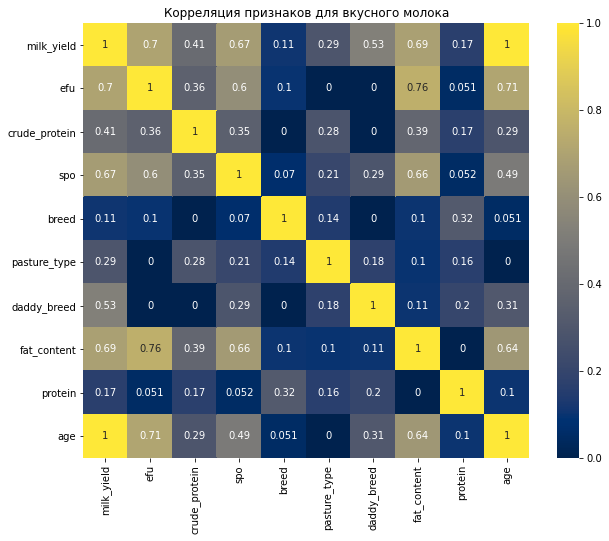

In [32]:
#посмотрим на коэффициенты корреляции между признаками
plt.figure(figsize=(10, 8))

sns.heatmap(ferma_main_corr[ferma_main_corr['taste'] == 'вкусно'].phik_matrix(), annot=True, cmap='cividis')
plt.title('Корреляция признаков для вкусного молока');

interval columns not set, guessing: ['milk_yield', 'efu', 'crude_protein', 'spo', 'fat_content', 'protein']


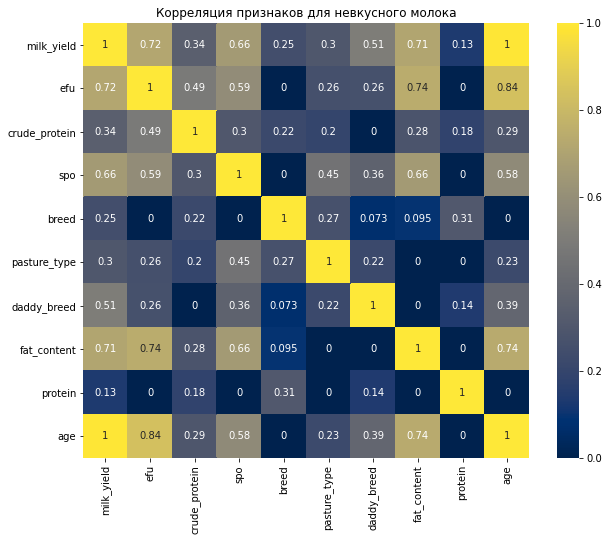

In [33]:
#посмотрим на коэффициенты корреляции между признаками
plt.figure(figsize=(10, 8))

sns.heatmap(ferma_main_corr[ferma_main_corr['taste'] == 'не вкусно'].phik_matrix(), annot=True, cmap='cividis')
plt.title('Корреляция признаков для невкусного молока');

Построим диаграммы рассеяния для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков.

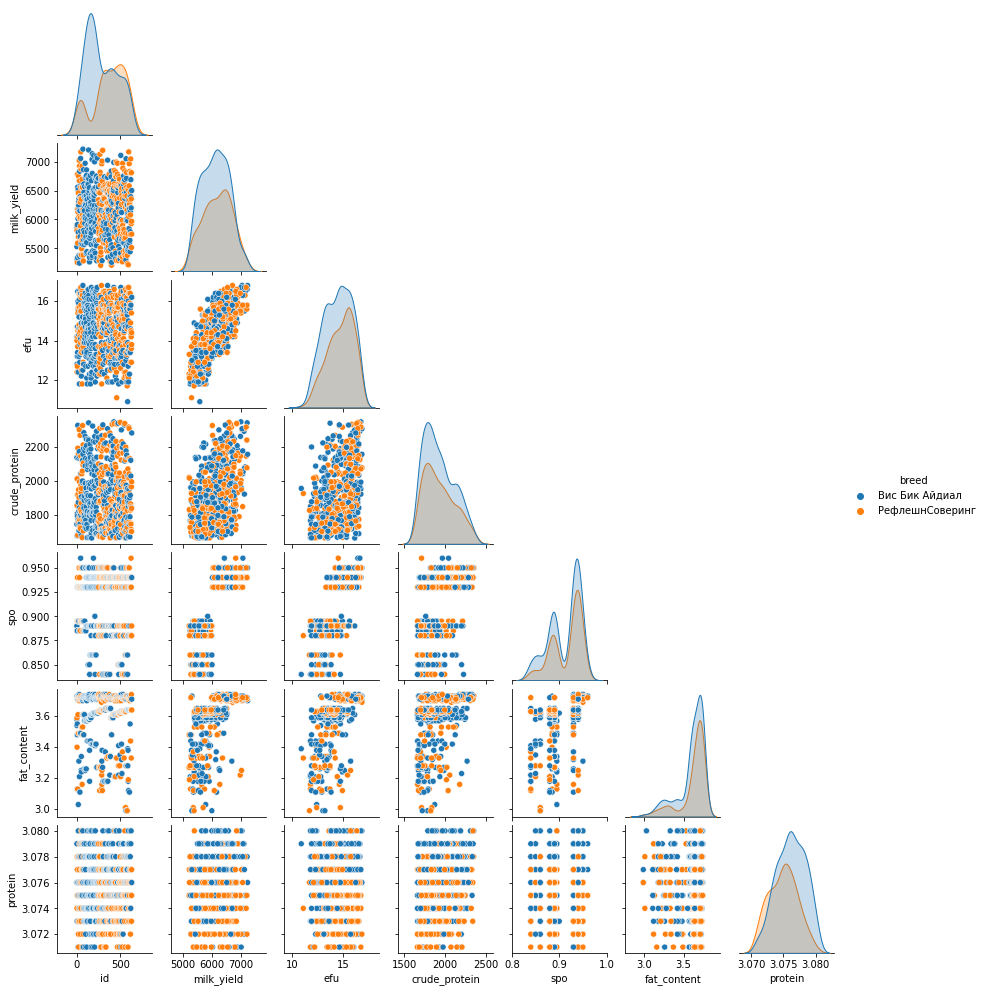

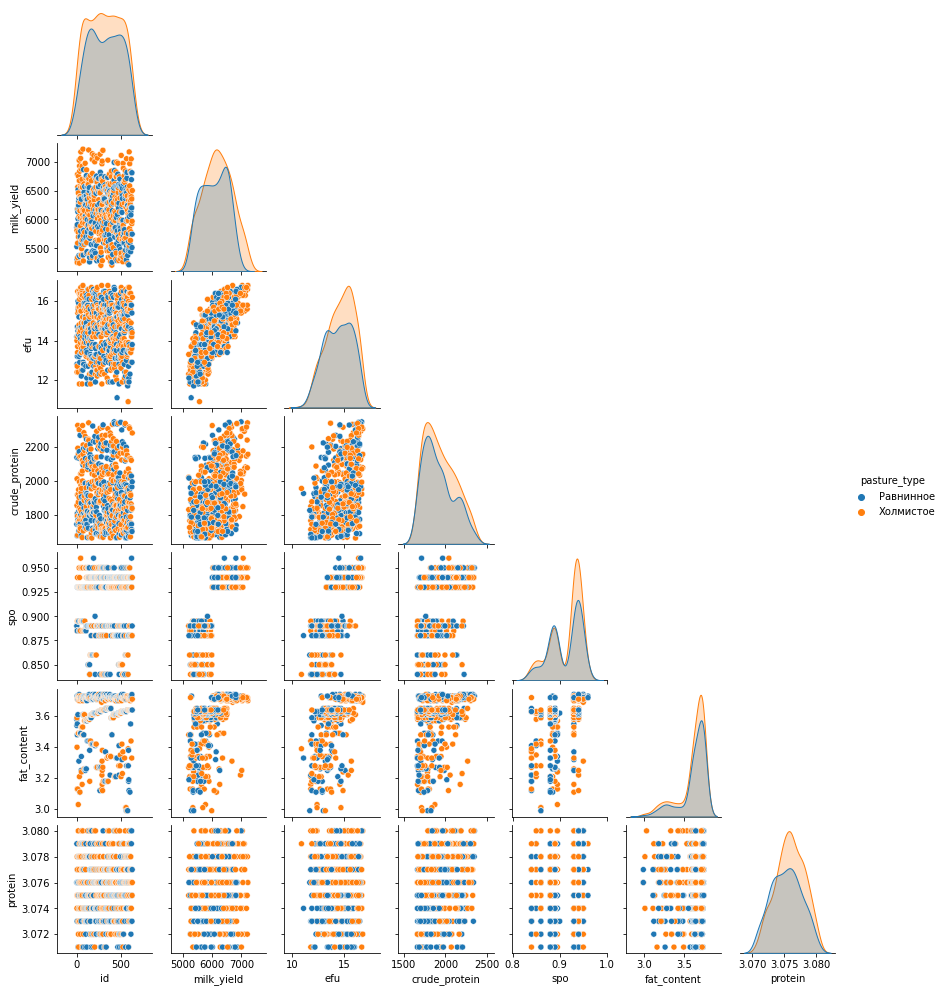

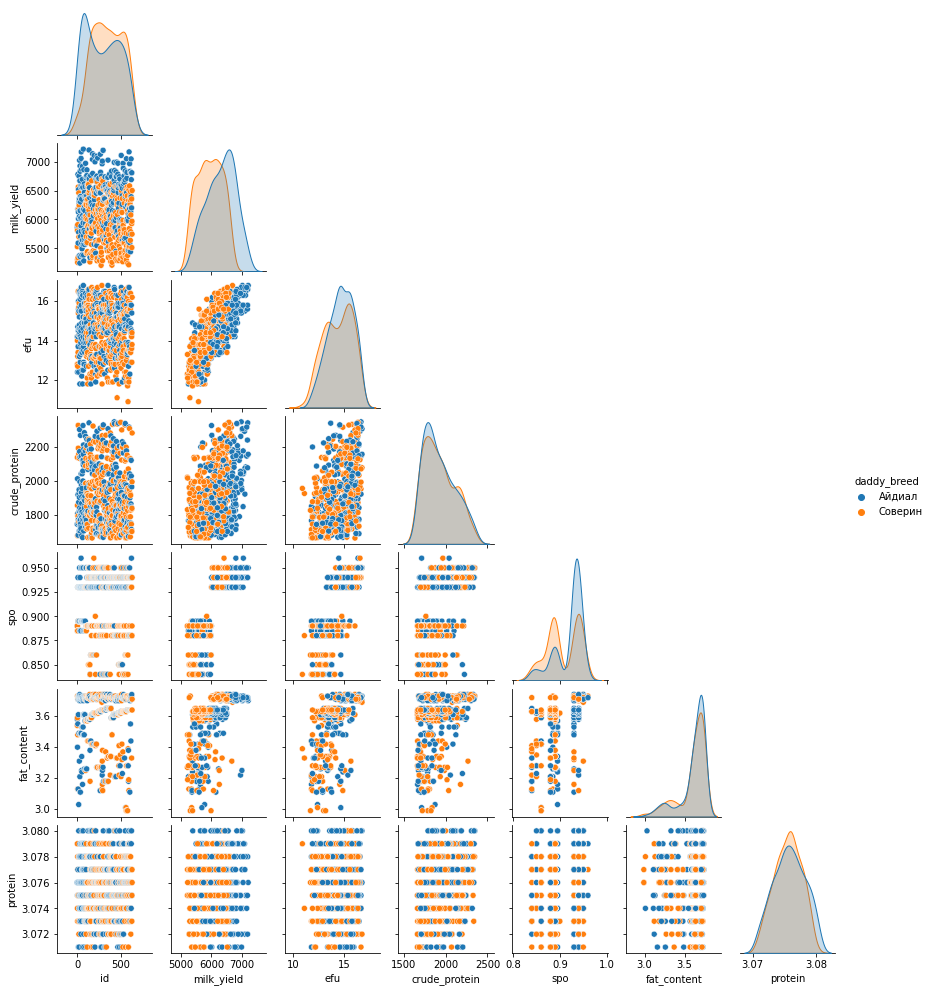

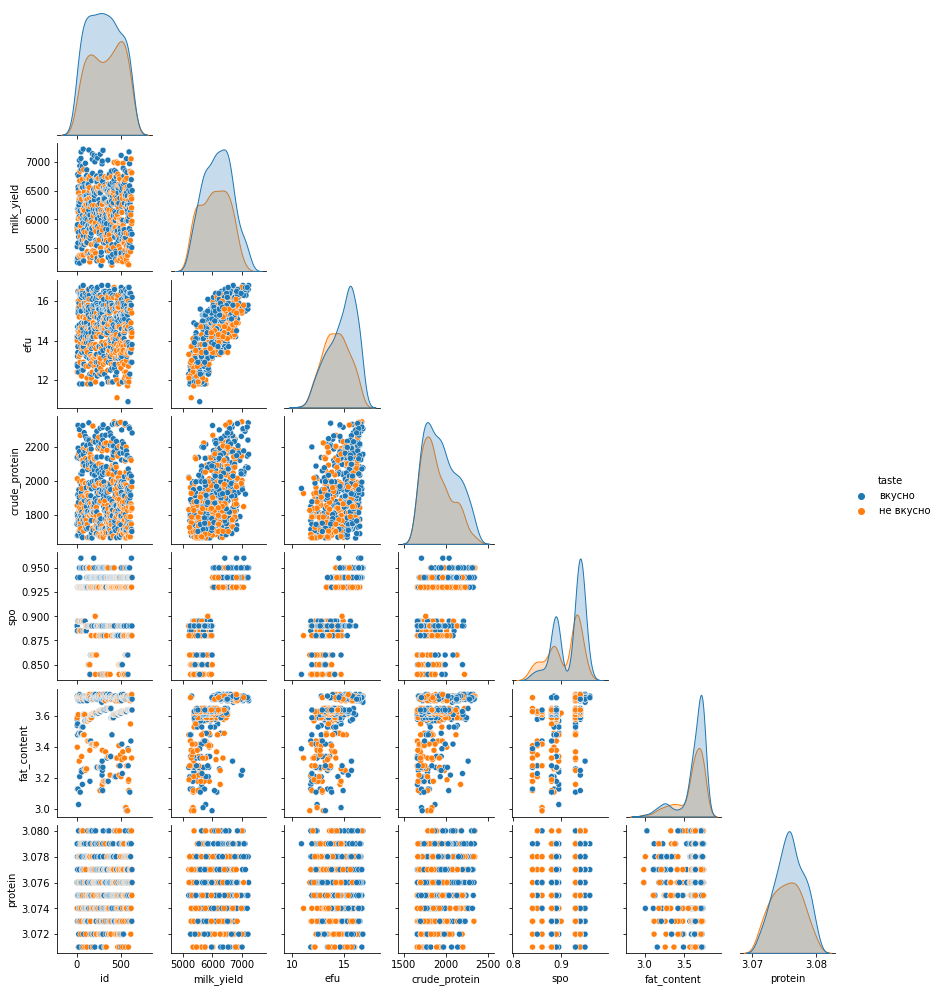

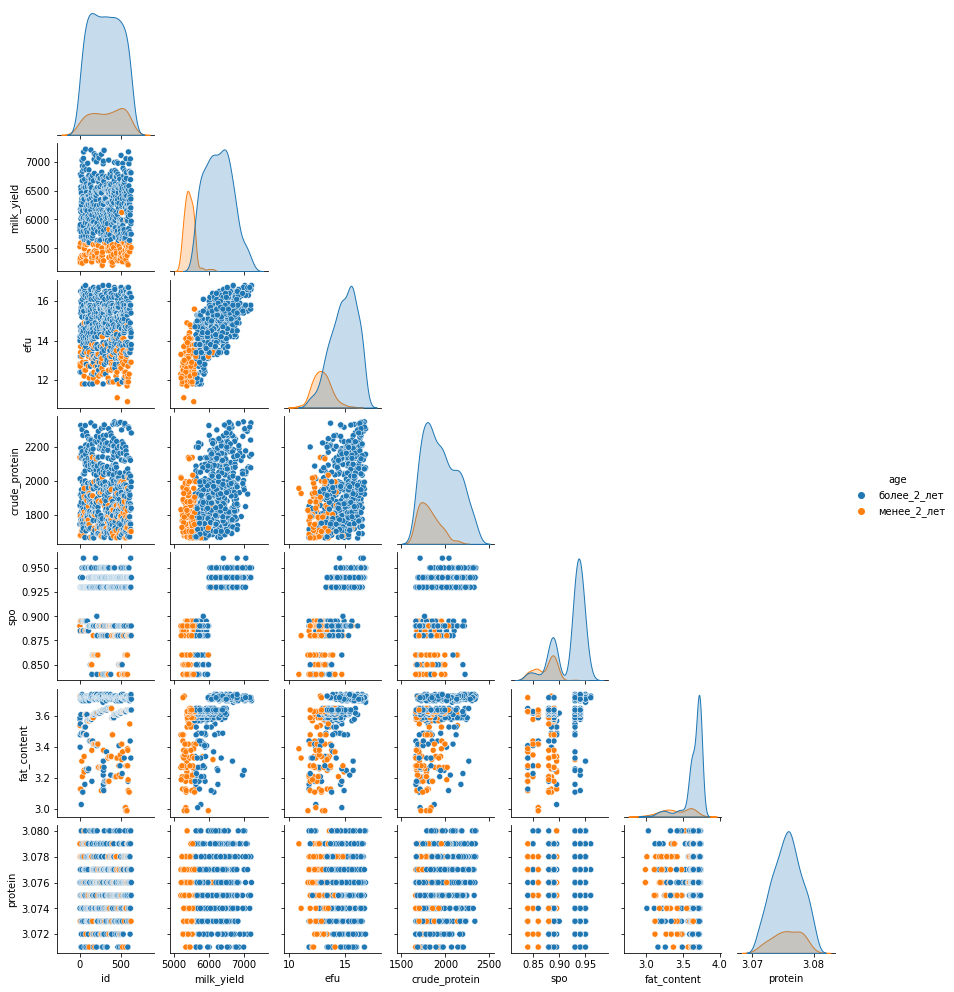

In [34]:
for el in ferma_main.columns:
    if el in cat_col:
        sns.pairplot(
            data=ferma_main, 
            aspect=.85,
            hue=el,
            corner=True,
            height=2);

Выводы: 
Целевой признак "УдоЙ" имеет:
1. прямую высокую корреляцию (0,7-0,9) с признаками:
* Энергетическая кормовая единица
* Сахаро-протеиновое соотношение
2. прямую заметную корреляцию с жирномтью;
3. прямую умеренную корреляцию с содержанием сырого протеина в корме.

Удой не зависит от одержания белка в молоке. 

Сахаро-протеиновое соотношение имеет заметную корреляцию с Энергетическая кормовая единица, нужно будет исключить один из признаков на этапе подготовки данных к обучению модели. 

Набдюдения:
1. Удой может быть выше, если порода папы Айдиал
2. Молоко вкуснее и надой больше у взрослых коров. Это наблюдение объясняется малым содержанием данных о коровах младше двух лет 

## Обучение модели линейной регрессии

Для первой модели линейной регресси выберем следующий признаки коров:
1. Из характеристики пород возьмем породу коровы и ее возраст.
ID совсем не влияет на удой, порода папы по логике имеет связь с породой коровы, хотя есть случаи, когда в породе коровы нет пересечений с породой папы. Оставим пока
2. Из характеристик корма возьмем только СПО, т.к. ЭКЕ связано с СПО, а Сырой протеин по логике должен коррелировать с СПО.
3. Из характеристик молока есть прямая связь с жирностью, ее и возьмем. Протеин не связан с удоем, его пока оставим. 
4. Характеристика пастбища у нас одна, оставим ее.

Рахобьем выборку на тренировочную и тестовую.

In [35]:

# делим датасет на выборки
X = ferma_main.drop(['id', 'milk_yield', 'efu', 'crude_protein', 'daddy_breed', 'protein', 'taste'], axis=1)
y = ferma_main['milk_yield']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)


In [36]:
#определяем количественные и категориальные значения 
cat_col_names = ['breed', 'pasture_type', 'age']
col_names = ['spo', 'fat_content']

In [37]:
#кодируем категориальные признаки

# выберем класс OneHotEncoder() для кодирования 
encoder = OneHotEncoder(sparse=False)

# обучаем и преобразовываем категориальные признаки из тренировочной выборки 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

# сохраним в переменной encoder_col_names названия новых столбцов 
encoder_col_names = encoder.get_feature_names()

In [38]:
#масштабируем количественные признаки

# создаем переменную с экземпляром класса StandartScaler()
scaler = StandardScaler()

# обучаем и преобразовываем количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[col_names])
X_test_scaled = scaler.transform(X_test[col_names])

In [39]:
# соберем все в один датафрейм

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_names)


X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [40]:
# задаем модель линейной регрессии
model_lr  = LinearRegression()

# обучаем модель на тренировочных данных
model_lr.fit(X_train, y_train)

# получаем предсказания модели на тестовых данных 
predictions = model_lr.predict(X_test)

In [41]:
#посмотрим на качество модели
mae = mean_absolute_error(y_test, predictions)
print(f'MAE = {mae:.0f}')

r2= r2_score(y_test, predictions)
print(f'r2 = {r2:.2f}')

mse = mean_squared_error(y_test, predictions) 
print(f'mse = {mse:.2f}')

rmse = mean_squared_error(y_test, predictions, squared=False) 
print(f'rmse = {rmse:.2f}')

MAE = 208
r2 = 0.72
mse = 67779.43
rmse = 260.34


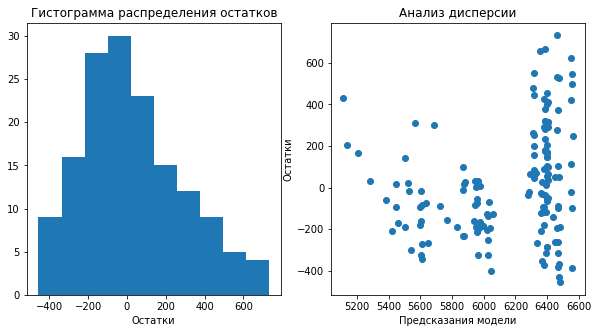

In [42]:
# проведем анализ остатков

# рассчитаем их
residuals = y_test - predictions

# построим графики гистограмму и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions, y=residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Выводы: 
Модель имеет недостаточное качество прогнозирования - остатки сдвинуты вправо, т.е. модель занижает прогнозные значения, разброс дисперсии не постоянный, метрика r2 показывает всего 0,72.
Нужно добавить данные в модель, ранее не учитываемые, и попробовать еще раз. 

На диаграмме рассеяния между удоем и СПО видна нелинейная зависимость: данные разбиты на два кластера. 
Напомним, как это выглядит:

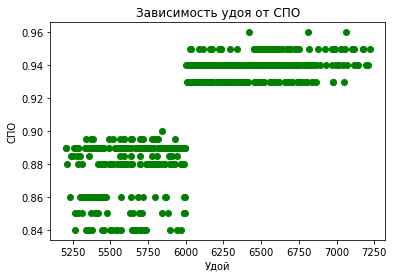

In [43]:
# построим график
fig, ax = plt.subplots()
ax.scatter(ferma_main["milk_yield"], ferma_main["spo"], c='green')

plt.xlabel('Удой')
plt.ylabel('СПО')
plt.title('Зависимость удоя от СПО')
plt.show()

In [44]:
# Сделаем СПО категориальным признаком - добавив границу на значении 0,91. 
# функция для условия
def spo_new(row):
    if row['spo'] < 0.91:
        return 0
    else:
        return 1
    
#доабавление данных в новый столбец 
ferma_main['spo_cat'] = ferma_main.apply(spo_new, axis=1)

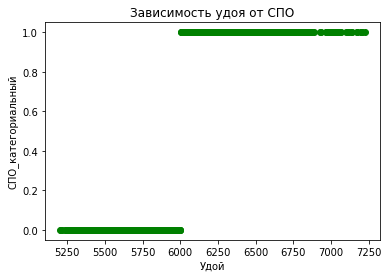

In [45]:
# построим график
fig, ax = plt.subplots()
ax.scatter(ferma_main["milk_yield"], ferma_main["spo_cat"], c='green')

plt.xlabel('Удой')
plt.ylabel('СПО_категориальный')
plt.title('Зависимость удоя от СПО')
plt.show()

Аналогичную процедуру проведем для ЭКЕ: посмотрим, как это выглядит и попробуем устранить нелинейность 

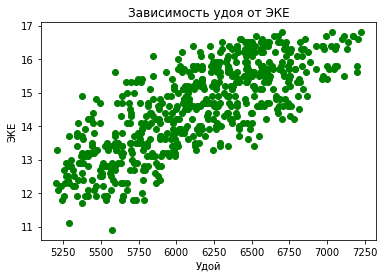

In [46]:
# построим график
fig, ax = plt.subplots()
ax.scatter(ferma_main["milk_yield"], ferma_main["efu"], c='green')

plt.xlabel('Удой')
plt.ylabel('ЭКЕ')
plt.title('Зависимость удоя от ЭКЕ')
plt.show()

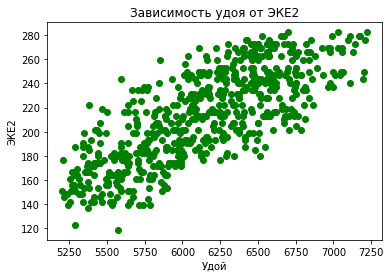

In [47]:
#добавим признак ЭКЕ в квадрате и попробуем еще раз посмотреть на распределение

ferma_main['efu_squared'] = ferma_main['efu']**2

# построим график
fig, ax = plt.subplots()
ax.scatter(ferma_main["milk_yield"], ferma_main["efu_squared"], c='green')

plt.xlabel('Удой')
plt.ylabel('ЭКЕ2')
plt.title('Зависимость удоя от ЭКЕ2')
plt.show()

Повторим обучение модели с учетом новых признаков.
Предыдущая модель не подходит, поэтому просто перезапишем ее

In [48]:
# создание константы RANDOM_STATE
RANDOM_STATE = 42


# делим датасет на выборки
X = ferma_main.drop(['id', 'milk_yield', 'efu', 'spo', 'crude_protein', 'daddy_breed', 'protein', 'taste'], axis=1)
y = ferma_main['milk_yield']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)


#определяем количественные и категориальные значения 
cat_col_names = ['breed', 'pasture_type', 'age']
col_names = ['spo_cat', 'fat_content', 'efu_squared']


#кодируем категориальные признаки
# выберем класс OneHotEncoder() для кодирования 
encoder = OneHotEncoder(sparse=False)

# обучаем и преобразовываем категориальные признаки из тренировочной выборки 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

# сохраним в переменной encoder_col_names названия новых столбцов 
encoder_col_names = encoder.get_feature_names()

#масштабируем количественные признаки
# создаем переменную с экземпляром класса StandartScaler()
scaler = StandardScaler()

# обучаем и преобразовываем количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[col_names])
X_test_scaled = scaler.transform(X_test[col_names])


# соберем все в один датафрейм

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_names)


X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)


# задаем модель линейной регрессии
model_lr  = LinearRegression()

# обучаем модель на тренировочных данных
model_lr.fit(X_train, y_train)

# получаем предсказания модели на тестовых данных 
predictions = model_lr.predict(X_test)

In [49]:
#посмотрим на качество модели
mae = mean_absolute_error(y_test, predictions)
print(f'MAE = {mae:.0f}')

r2= r2_score(y_test, predictions)
print(f'r2 = {r2:.2f}')

mse = mean_squared_error(y_test, predictions) 
print(f'mse = {mse:.2f}')

rmse = mean_squared_error(y_test, predictions, squared=False) 
print(f'rmse = {rmse:.2f}')

MAE = 177
r2 = 0.78
mse = 52348.48
rmse = 228.80


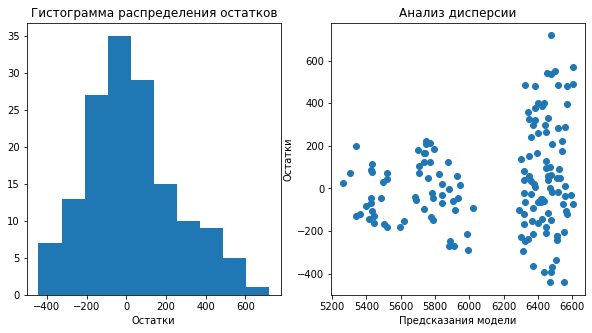

In [50]:
# проведем анализ остатков

# рассчитаем их
residuals = y_test - predictions

# построим графики гистограмму и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions, y=residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Выводы: 
Стало получше. Остатки теперь распределены нормально, хотя дисперсия все еще не имеет постоянного разброса. 
Качество модели повысилось до 0,79, а rmse сократилась на 40 литров. Попробуем еще улучшить, разброс остатков сильно похож на "рупор", модель использовать нежелательно. 

In [51]:
#добавим имя папы из ferma_dad по id
ferma_main = ferma_main.merge(ferma_dad, how = 'left', left_on='id', right_on='id')
ferma_main.head()

,id,milk_yield,efu,crude_protein,spo,breed,pasture_type,daddy_breed,fat_content,protein,taste,age,spo_cat,efu_squared,daddy_name
0,1,5863,14.20,1743,0.89,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.08,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529,12.80,2138,0.89,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.08,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810,14.00,1854,0.89,РефлешнСоверинг,Холмистое,Соверин,3.59,3.07,не вкусно,более_2_лет,0,196.00,Барин
3,4,5895,12.40,2012,0.89,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.08,не вкусно,более_2_лет,0,153.76,Буйный
4,5,5302,12.80,1675,0.89,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.07,вкусно,менее_2_лет,0,163.84,Барин


Попробуем в этот раз забрать ранее неиспользуемые данные - все, кроме ID, spo (заберем его категориальную версию), efu (заберем его версию в квадрате)

In [52]:
# создание константы RANDOM_STATE
RANDOM_STATE = 42


# делим датасет на выборки
X = ferma_main.drop(['id', 'milk_yield', 'efu', 'spo', 'taste'], axis=1)
y = ferma_main['milk_yield']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)


#определяем количественные и категориальные значения 
cat_col_names = ['breed', 'pasture_type', 'age', 'daddy_breed', 'daddy_name']
col_names = ['spo_cat', 'fat_content', 'efu_squared', 'crude_protein', 'protein']


#кодируем категориальные признаки
# выберем класс OneHotEncoder() для кодирования 
encoder = OneHotEncoder(sparse=False)

# обучаем и преобразовываем категориальные признаки из тренировочной выборки 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

# сохраним в переменной encoder_col_names названия новых столбцов 
encoder_col_names = encoder.get_feature_names()

#масштабируем количественные признаки
# создаем переменную с экземпляром класса StandartScaler()
scaler = StandardScaler()

# обучаем и преобразовываем количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[col_names])
X_test_scaled = scaler.transform(X_test[col_names])


# соберем все в один датафрейм

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_names)


X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)


# задаем модель линейной регрессии
model_lr  = LinearRegression()

# обучаем модель на тренировочных данных
model_lr.fit(X_train, y_train)

# получаем предсказания модели на тестовых данных 
predictions = model_lr.predict(X_test)

In [53]:
#посмотрим на качество модели
mae = mean_absolute_error(y_test, predictions)
print(f'MAE = {mae:.0f}')

r2= r2_score(y_test, predictions)
print(f'r2 = {r2:.2f}')

mse = mean_squared_error(y_test, predictions) 
print(f'mse = {mse:.2f}')

rmse = mean_squared_error(y_test, predictions, squared=False) 
print(f'rmse = {rmse:.2f}')

MAE = 146
r2 = 0.85
mse = 36143.46
rmse = 190.11


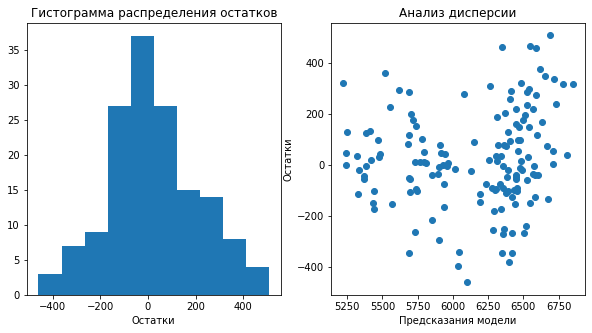

In [54]:
# проведем анализ остатков

# рассчитаем их
residuals = y_test - predictions

# построим графики гистограмму и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions, y=residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Ну вот, уже лучше. Качество модели наконец превысило порог в 0.8, остатки распределены нормально и, главное, дисперсия постоянная.
Можно брать)

Спрогнозируем удой коров в Экоферме

In [55]:
#напомним, какие столбцы сейчас есть в Экоферме
cow_buy.head(3)

,breed_ecofarms,pasture_type_ecofarms,daddy_breed_ecofarms,daddy_name_ecofarms,fat_content_ecofarms,protein_ecofarms,age_ecofarms
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.08,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.08,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.07,более_2_лет


In [56]:
#добавим ЭКЕ и СПО в дф с коровами для покупки - фермер планировал увеличить показатели на 5% от текущих. возьмем среднее
cow_buy['crude_protein'] = ferma_main['crude_protein'].mean()
cow_buy['spo'] = ferma_main['spo'].mean() * 1.05
cow_buy['efu'] = ferma_main['efu'].mean() * 1.05
cow_buy['spo_cat'] = 1
cow_buy['efu_squared'] = cow_buy['efu']**2

In [57]:
#приведем к единому виду тип пастбищ в обоих таблицах
cow_buy['pasture_type_ecofarms'] = cow_buy['pasture_type_ecofarms'].replace('равнинное', 'Равнинное')
cow_buy['pasture_type_ecofarms'] = cow_buy['pasture_type_ecofarms'].replace('холмистое', 'Холмистое')

In [58]:
#проверим, что все добавилось
cow_buy.head(2)

,breed_ecofarms,pasture_type_ecofarms,daddy_breed_ecofarms,daddy_name_ecofarms,fat_content_ecofarms,protein_ecofarms,age_ecofarms,crude_protein,spo,efu,spo_cat,efu_squared
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.08,более_2_лет,1923.38,0.96,15.27,1,233.06
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.08,менее_2_лет,1923.38,0.96,15.27,1,233.06


In [59]:
cow_buy['pasture_type_ecofarms'].unique()

array(['Холмистое', 'Равнинное'], dtype=object)

In [60]:
#посмотрим, какие данные выбраны для мождели
X.head(2)

,crude_protein,breed,pasture_type,daddy_breed,fat_content,protein,age,spo_cat,efu_squared,daddy_name
0,1743,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.08,более_2_лет,0,201.64,Буйный
1,2138,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.08,менее_2_лет,0,163.84,Соловчик


In [61]:
X['pasture_type'].unique()

array(['Равнинное', 'Холмистое'], dtype=object)

In [62]:
#разделим столбцы на категориальные и количественные
cat_col_names_eco = ['breed_ecofarms', 'pasture_type_ecofarms', 'age_ecofarms', 'daddy_breed_ecofarms', 'daddy_name_ecofarms']
col_names_eco = ['spo_cat', 'fat_content_ecofarms', 'efu_squared', 'crude_protein', 'protein_ecofarms']

In [63]:
#удалим из данных Экофермы неиспользуемые в модели столбцы 
X2 = cow_buy.drop(['efu', 'spo'], axis=1)

# обучаем и преобразовываем категориальные признаки из тренировочной выборки 
X_cow_eho = encoder.transform(X2[cat_col_names_eco])

# сохраним в переменной encoder_col_names названия новых столбцов 
encoder_col_names_cow = encoder.get_feature_names()

# обучаем и преобразовываем количественные признаки из тренировочной выборки 
X_cow_scaled = scaler.transform(X2[col_names_eco])

# соберем все в один датафрейм
X_cow_eho2 = pd.DataFrame(X_cow_eho, columns=encoder_col_names_cow)
X_cow_scaled2 = pd.DataFrame(X_cow_scaled, columns=col_names_eco)

X_train_cow = pd.concat([X_cow_eho2, X_cow_scaled2], axis=1)

# получаем предсказания модели на тестовых данных 
predictions = model_lr.predict(X_train_cow)

In [64]:
#добавим в Экоферму прогноз удоя
cow_buy['milk'] = predictions


In [65]:
#проверяем
cow_buy

,breed_ecofarms,pasture_type_ecofarms,daddy_breed_ecofarms,daddy_name_ecofarms,fat_content_ecofarms,protein_ecofarms,age_ecofarms,crude_protein,spo,efu,spo_cat,efu_squared,milk
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.08,более_2_лет,1923.38,0.96,15.27,1,233.06,6562.97
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.08,менее_2_лет,1923.38,0.96,15.27,1,233.06,6228.96
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.07,более_2_лет,1923.38,0.96,15.27,1,233.06,6245.30
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.06,более_2_лет,1923.38,0.96,15.27,1,233.06,6638.55
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.07,более_2_лет,1923.38,0.96,15.27,1,233.06,6494.83
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.05,менее_2_лет,1923.38,0.96,15.27,1,233.06,6525.29
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.08,более_2_лет,1923.38,0.96,15.27,1,233.06,6562.97
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.08,более_2_лет,1923.38,0.96,15.27,1,233.06,6452.36
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.07,более_2_лет,1923.38,0.96,15.27,1,233.06,6245.30
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.08,менее_2_лет,1923.38,0.96,15.27,1,233.06,6286.68


Выводы:
1. При построении модели исключены признаки ЭКЕ и СПО для улучшения прогноза (кач = 0,85)
2. По данным прогноза все коровы дадут удой больше 6 ьыс литров

## Обучение модели логистической регрессии

Теперь нам предстоит научить модель определять вкус молока.
Прежде, чем обучать модель, проведем некоторые манипуляции:
1. Добавим столбец, в котором вкусное молоко будет иметь значение 1, невкусное - 0
2. Посмотрим, как коррелируют между собой признаки 

In [66]:
#добавляем столбец 
def taste(row):
    if row['taste'] == 'вкусно':
        return 1
    else:
        return 0
    
ferma_main['taste_new'] = ferma_main.apply(taste, axis=1)

Из корреляционного анализа видно, что вкус практически не связан с другими показателями, больше всего на него влияет СПО и ЭКЕ.
У нас есть корреляция между именем папы и его породой, однако опытным путем выявлено, что качество модели ухудшается на сотые доли при исключении любого из признаков. Оставим.
Уберем жирность, т.к. она тесно связана с СПО, ЭКЕ и в принципе нелогично использовать признак, который предсказан на медианных значениях обучающе выборки.

interval columns not set, guessing: ['milk_yield', 'efu', 'crude_protein', 'spo', 'fat_content', 'protein']


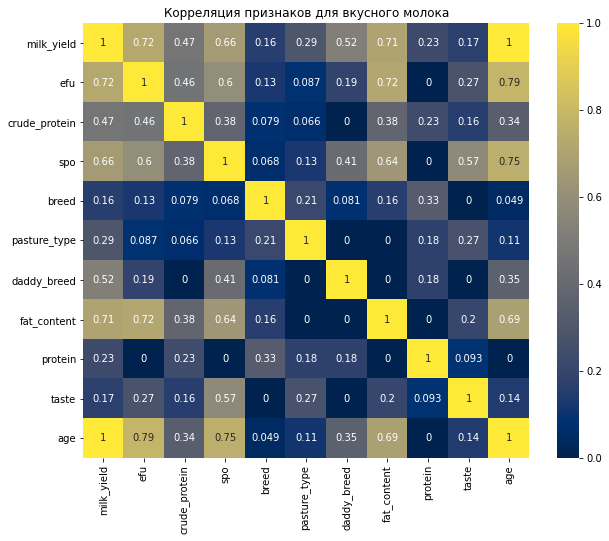

In [67]:
#посмотрим на коэффициенты корреляции между признаками
plt.figure(figsize=(10, 8))

sns.heatmap(ferma_main_corr.phik_matrix(), annot=True, cmap='cividis')
plt.title('Корреляция признаков для вкусного молока');

0.6423841059602649
0.660377358490566
0.7954545454545454


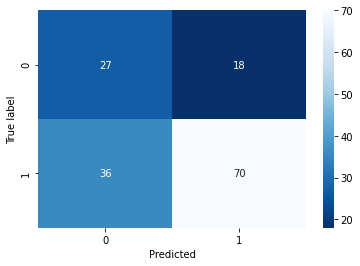

In [68]:

# делим датасет на выборки
X3 = ferma_main.drop(['id', 'taste','taste_new','fat_content'], axis=1)
y3 = ferma_main['taste_new']
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X3, 
    y3, 
    random_state=RANDOM_STATE
)

#определяем количественные и категориальные значения 
cat_col_names = ['breed',  'age', 'pasture_type', 'daddy_name',  'daddy_breed']
col_names = ['efu_squared','protein','crude_protein', 'efu',  'spo',  'spo_cat', 'milk_yield']
#масштабируем количественные признаки
# создаем переменную с экземпляром класса StandartScaler()
scaler3 = StandardScaler()

# обучаем и преобразовываем количественные признаки из тренировочной выборки 
X_train_scaled3 = scaler3.fit_transform(X_train3[col_names])
X_test_scaled3 = scaler3.transform(X_test3[col_names])

#кодируем категориальные признаки
# выберем класс OneHotEncoder() для кодирования 
encoder3 = OneHotEncoder(sparse=False)


# обучаем и преобразовываем категориальные признаки из тренировочной выборки 
X_train_ohe3 = encoder3.fit_transform(X_train3[cat_col_names])
X_test_ohe3 = encoder3.transform(X_test3[cat_col_names])

# сохраним в переменной encoder_col_names названия новых столбцов 
encoder_col_names3 = encoder3.get_feature_names()


# соберем все в один датафрейм
X_train_ohe3 = pd.DataFrame(X_train_ohe3, columns=encoder_col_names3)
X_test_ohe3 = pd.DataFrame(X_test_ohe3, columns=encoder_col_names3)

X_train_scaled3 = pd.DataFrame(X_train_scaled3, columns=col_names)
X_test_scaled3 = pd.DataFrame(X_test_scaled3, columns=col_names)


X_train3 = pd.concat([X_train_ohe3, X_train_scaled3], axis=1)
X_test3 = pd.concat([X_test_ohe3, X_test_scaled3], axis=1)



# создаём объект для работы с моделью
clf = LogisticRegression(random_state=RANDOM_STATE)


clf2 = clf.fit(X_train3, y_train3)



y_pred3 = clf.predict(X_test3) 
print(accuracy_score(y_pred3, y_test3)) 
print(recall_score(y_pred3, y_test3)) 
print(precision_score(y_pred3, y_test3)) 

#посмотрим на качество модели
cm = confusion_matrix(y_pred3, y_test3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

In [69]:
#посмотрим на веса показателей
for feature_number, feature_name in enumerate(X_train3.columns):
    weight = clf.coef_[0, feature_number]
    print(f"{feature_name:<20}: {weight:+.6f}") 

x0_Вис Бик Айдиал   : +0.045694
x0_РефлешнСоверинг  : -0.045079
x1_более_2_лет      : -0.080565
x1_менее_2_лет      : +0.081180
x2_Равнинное        : -0.472786
x2_Холмистое        : +0.473401
x3_Барин            : -0.062772
x3_Буйный           : +0.119545
x3_Геркулес         : +0.328851
x3_Соловчик         : -0.385009
x4_Айдиал           : +0.096530
x4_Соверин          : -0.095915
efu_squared         : +0.786691
protein             : +0.011258
crude_protein       : +0.217808
efu                 : -0.141385
spo                 : +1.487454
spo_cat             : -1.569269
milk_yield          : -0.301528


Определимся: качество модели оставляет желать лучшего. Сильно лучшего, учитывая, что accuracy не доходит даже до 70.
Поскольку вкус молока для фермера приоритетен, нам требуется исключить ошибки первого рода, т.е. метрика precision должна быть равна 1. 

Попробуем поменять порог, для этого посмотрим, на каком пороге модель впервые ошибается. 

In [70]:
#Посмотрим на этот порог
y_test_pred_new= clf2.predict_proba(X_test3)[:,1]
data = pd.DataFrame(zip(y_test3, y_test_pred_new),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

print(data.head(20)) 

     y_valid  y_proba
19         1     0.92
87         1     0.91
2          1     0.90
118        1     0.90
22         1     0.88
120        1     0.88
28         1     0.88
43         1     0.87
6          1     0.86
138        1     0.86
60         0     0.85
10         1     0.85
121        1     0.84
36         1     0.84
146        1     0.83
90         1     0.83
42         1     0.82
72         1     0.81
68         1     0.81
147        1     0.78


Получается. что при пороге в 0,85 модель всегда будет верно предсказывать вкус. Проверим

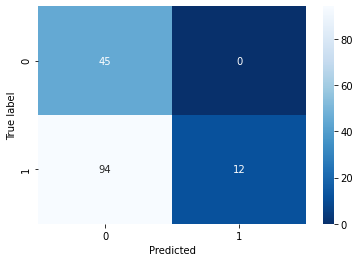

In [71]:
#посмотрим на качество при пороге 0,85
y_test_pred = clf.predict_proba(X_test3)[:,1] > 0.85

#построим матрицу ошибок и убедимся, что ошибка первого рода исключена
cm = confusion_matrix(y_pred3, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

определились с порогами, пора и вкус предсказывать

In [72]:
#определяем столбцы, которые понадобятся для модели
cat_col_names_eco4 = ['breed_ecofarms','age_ecofarms',  'daddy_breed_ecofarms', 'daddy_name_ecofarms', 'pasture_type_ecofarms']
col_names_eco4 = ['spo_cat', 'efu_squared', 'spo',  'crude_protein', 'efu', 'milk', 'protein_ecofarms']

In [73]:
#удаляем лишнее
X4 = cow_buy.drop(['fat_content_ecofarms' ], axis=1)

# обучаем и преобразовываем категориальные признаки из тренировочной выборки 
X4_cow_eho = encoder3.fit_transform(X4[cat_col_names_eco4])

# сохраним в переменной encoder_col_names названия новых столбцов 
encoder_col_names_cow4 = encoder3.get_feature_names()

# обучаем и преобразовываем количественные признаки из тренировочной выборки 
X_cow_scaled4 = scaler3.fit_transform(X4[col_names_eco4])

# соберем все в один датафрейм
X_cow_eho4 = pd.DataFrame(X4_cow_eho, columns=encoder_col_names_cow4)
X_cow_scaled4 = pd.DataFrame(X_cow_scaled4, columns=col_names_eco4)

In [74]:
#соберем данные
X_train_cow4 = pd.concat([X_cow_eho4, X_cow_scaled4], axis=1)


# получаем предсказания модели на тестовых данных 
predictions_taste = clf.predict(X_train_cow4)

In [75]:
#Применяем порог
y_test_pred3333 = clf.predict_proba(X_train_cow4)[:,1] > 0.78

In [76]:
#Добавляем в таблицу экофермы предсказание вкуса
cow_buy['taste'] = y_test_pred3333.astype(int)
cow_buy

,breed_ecofarms,pasture_type_ecofarms,daddy_breed_ecofarms,daddy_name_ecofarms,fat_content_ecofarms,protein_ecofarms,age_ecofarms,crude_protein,spo,efu,spo_cat,efu_squared,milk,taste
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.08,более_2_лет,1923.38,0.96,15.27,1,233.06,6562.97,0
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.08,менее_2_лет,1923.38,0.96,15.27,1,233.06,6228.96,1
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.07,более_2_лет,1923.38,0.96,15.27,1,233.06,6245.30,0
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.06,более_2_лет,1923.38,0.96,15.27,1,233.06,6638.55,0
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.07,более_2_лет,1923.38,0.96,15.27,1,233.06,6494.83,0
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.05,менее_2_лет,1923.38,0.96,15.27,1,233.06,6525.29,0
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.08,более_2_лет,1923.38,0.96,15.27,1,233.06,6562.97,0
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.08,более_2_лет,1923.38,0.96,15.27,1,233.06,6452.36,0
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.07,более_2_лет,1923.38,0.96,15.27,1,233.06,6245.30,0
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.08,менее_2_лет,1923.38,0.96,15.27,1,233.06,6286.68,0


## Итоговые выводы

Мы предсказали удой и вкус молока для всех коров эЭкофермы. Отберем коров, которых можно рекомендовать к покупке, учитывая входные требования

In [77]:
#отберем коров с удоем от 6 тыс. дитров и вкусным молоком
cow_buy_to_buy = cow_buy[(cow_buy['milk'] > 6000) & (cow_buy['taste'] == 1) ]
cow_buy_to_buy

,breed_ecofarms,pasture_type_ecofarms,daddy_breed_ecofarms,daddy_name_ecofarms,fat_content_ecofarms,protein_ecofarms,age_ecofarms,crude_protein,spo,efu,spo_cat,efu_squared,milk,taste
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.08,менее_2_лет,1923.38,0.96,15.27,1,233.06,6228.96,1
13,Вис Бик Айдиал,Холмистое,Соверин,Барин,3.42,3.08,менее_2_лет,1923.38,0.96,15.27,1,233.06,6063.98,1


Всего получилось 2 коровы, которых можно рекомендовать к покупке. 

Итоговый вывод:
1. Для покупки рекомендовано 2 коровы с прогнозным удоем от 6000 литров и вкусным молоком.
2. При расчете прогноза удоя были исключены признаки ЭКЕ и СПО, т.к. они коррелировали с добавленными признаками (категория СПО и ЭКЕ в квадрате) и снижали качество модели;
3. При расчете прогнозного вкуса исключена жирность, т.к. имеет связь с СПО и ЭКЕ, а также она заполнена медианой из обучающей выборки. 


В зависимости от задач важными при анализе рисков или экономических расчётов могут быть разные метрики. например, если важно, чтобы модель максимально верно пресказывала правдивые значения (на нашем примере - вкус), важно свести к нулю ошибку 1-го рода, т.е. precision - точноть - должна быть близка к 1.
Если же нам важно, к примеру, свести к минимуму ошибки, когда вкусное молоко модель считает невкусным (ошибка 2-го рода), то здесь уместнее рассматривать  recall - полноту. 